<a href="https://colab.research.google.com/github/KPxto/bootcamp-alura/blob/master/BootcampDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Alura - Semana 1

### **Aula 01**

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from io import StringIO
import datetime 

%matplotlib inline
plt.style.use('fivethirtyeight')
import collections

### Carregando nosso dataset

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv'
dados = pd.read_csv(url, encoding='latin1', sep=';',
              skiprows=3, skipfooter=12, thousands='.', decimal=',')


c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
# setando opção de visualização do número
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# visualizando as 5 primeiras linhas 
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,305010883.18
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4437115730.71


In [5]:
# media de todo DF
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

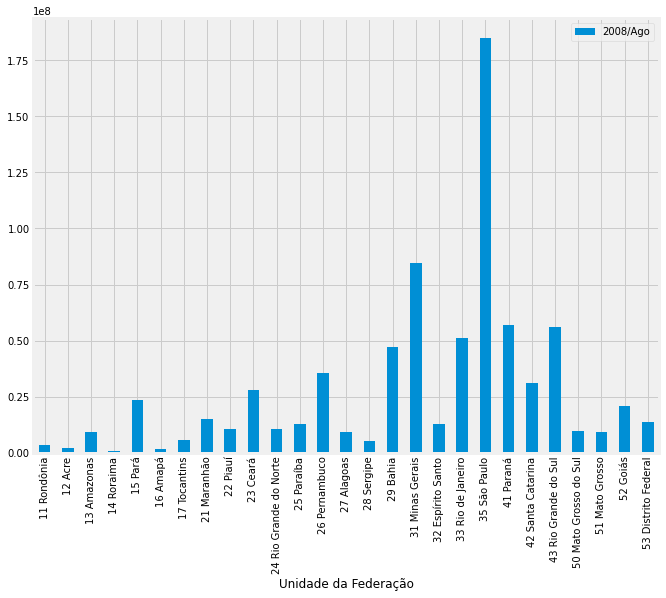

In [6]:
# plotando um grafico simples com pandas
dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(10,8));

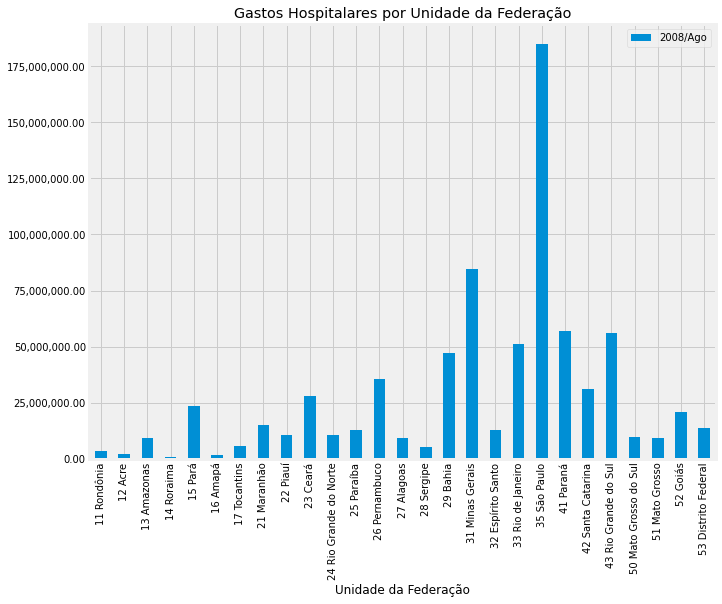

In [7]:
# alterando o grafico anterior com matplotlib e analisando dados do mes mais recente
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(10,8))
# codigo para alterar formatação dos ticks do eixo y para 2 casas decimais
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.title('Gastos Hospitalares por Unidade da Federação');

In [8]:
# verificando nossos dados vemos que temos 2 colunas como objeto, quando deveriamos ter somente 1, a dos estados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [9]:
# vamos ver quais colunas objeto sao essas
dados.select_dtypes(exclude='number')

,Unidade da Federação,2009/Set,2020/Ago
0,11 Rondônia,3605007.43,10285455.78
1,12 Acre,-,-
2,13 Amazonas,9730634.16,14726443.67
3,14 Roraima,1701611.25,2826486.18
4,15 Pará,27967969.22,39911193.02
5,16 Amapá,2034329.78,2942273.94
6,17 Tocantins,6542918.14,8240261.38
7,21 Maranhão,19722895.51,28587541.78
8,22 Piauí,12247027.29,23210624.20
9,23 Ceará,34471579.06,59808605.59


In [10]:
# vamos padronizar a coluna 2009/Set para ficar igual as outras do conjunto de dados
dados.replace('-', 0, inplace=True)
dados['2009/Set'] = dados['2009/Set'].astype(float)

In [11]:
# verificando novamente, nosso problema foi resolvido
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(152), object(2)
memory usage: 32.6+ KB


In [12]:
dados.select_dtypes(exclude='number')

,Unidade da Federação,2020/Ago
0,11 Rondônia,10285455.78
1,12 Acre,0
2,13 Amazonas,14726443.67
3,14 Roraima,2826486.18
4,15 Pará,39911193.02
5,16 Amapá,2942273.94
6,17 Tocantins,8240261.38
7,21 Maranhão,28587541.78
8,22 Piauí,23210624.20
9,23 Ceará,59808605.59


### **Aula 02**

### Vamos carregar o proximo dataset 

In [13]:
# vamos pegar os dados do url disponibilizado pela Alura
url2 = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'
dados2 = pd.read_csv(url2, encoding='latin1', sep=';', skiprows=3, skipfooter=12, thousands='.', decimal=',')

c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
dados2.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [15]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(157), object(123)
memory usage: 59.2+ KB


In [16]:
# visualizando 2 colunas
dados2[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [17]:
# aplicando a media para retornar um subset de valores nao nulos
# depois pegaremos somente os indices
# esses indices formarao uma lista com as colunas desejadas
# para completar a lista, vamos inserir o valor referindo-se aos estados 
colunas_usaveis = dados2.mean().index.to_list()
colunas_usaveis.insert(0, 'Unidade da Federação')

In [18]:
# criando novo dataframe a partir do subset anterior
usaveis = dados2[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


In [19]:
# setando o novo indice com os estados sendo as chaves
usaveis.set_index('Unidade da Federação', inplace=True)

In [20]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


### Plotando um grafico do meu estado

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


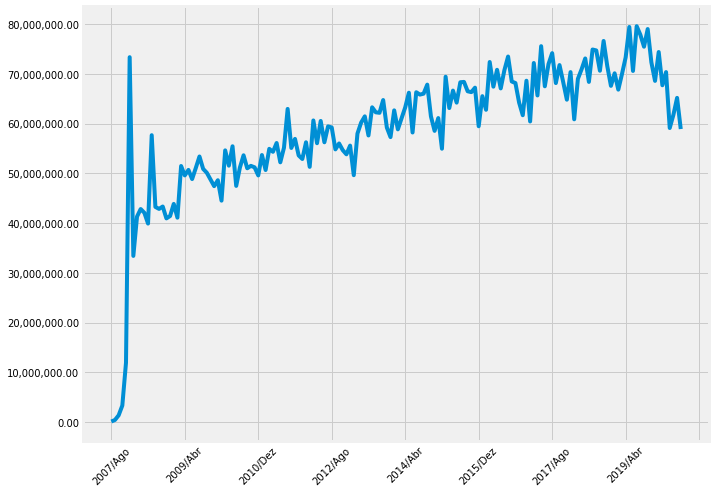

In [21]:
bahia = usaveis.loc['29 Bahia']
del bahia['Total']
ax = bahia.plot(x=bahia.index, y=bahia.values, figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=45);

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

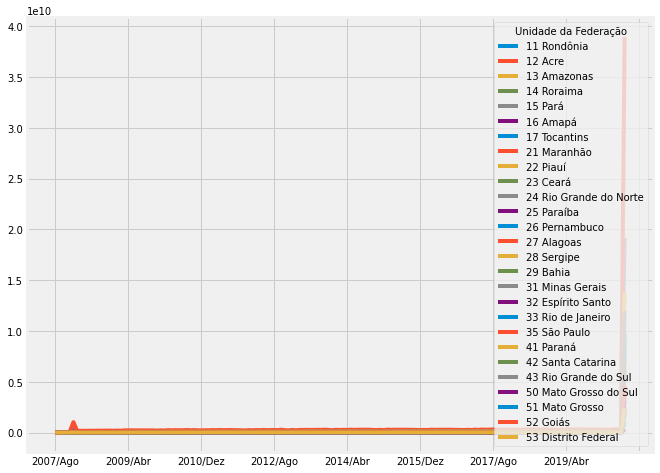

In [22]:
# aqui vamos transpor nosso df para que as datas fiquem no eixo x
# vemos que os ultimos valores do grafico tem uma subida brusca
# esta subida deve-se a coluna 'Total', que distorce a visualização
usaveis.T.plot(figsize=(10,8))

In [23]:
# vamos excluir a coluna total
usaveis = usaveis.drop('Total', axis=1)

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

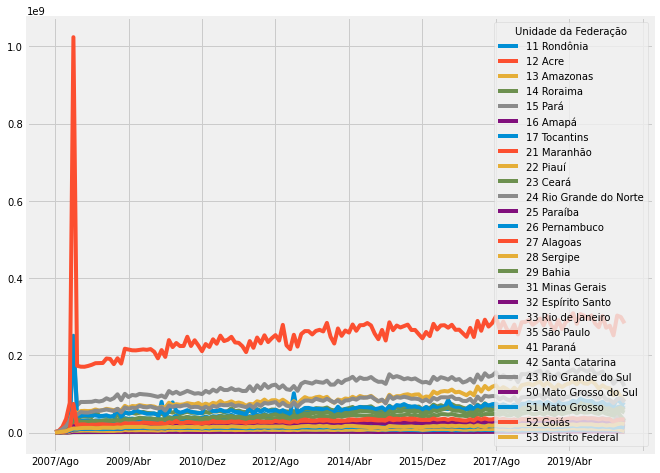

In [24]:
usaveis.T.plot(figsize=(10,8))

### Reposicionar a legenda

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


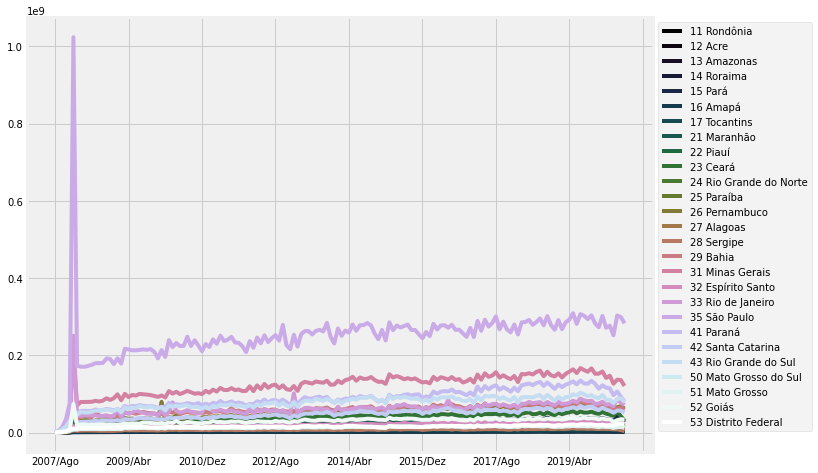

In [25]:
cm = plt.get_cmap('cubehelix')
usaveis.T.plot(figsize=(10,8), cmap=cm)
plt.legend(bbox_to_anchor=(1, 1));

### Verificando os 5 maiores gastadores

In [26]:
# vamos pegar os 5 maiores gastadores
top5 = usaveis.sum(axis=1).nlargest(5).index.to_list()

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


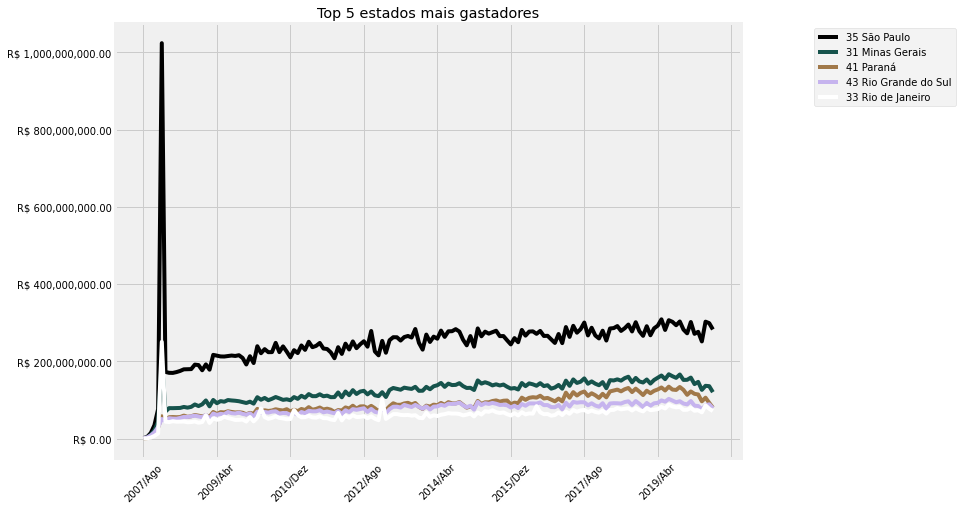

In [27]:
ax = usaveis.loc[top5].T.plot(figsize=(10,8), colormap='cubehelix')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Top 5 estados mais gastadores');

## **Aula 03**

### Criando nova coluna de região

In [28]:
# vamos colocar os estados numa lista para que possamos percorre-la
# depois vamos criar uma formula que vai atribuir a regiao de cada estado
lista_estados = usaveis.index.to_list()
def regiao(ls):
  for i in ls:
    if i[0]=='1':
      return 'Norte'
    if i[0]=='2':
      return 'Nordeste'
    if i[0]=='3':
      return 'Sudeste'
    if i[0]=='4':
      return 'Sul'
    if i[0]=='5':
      return 'Centro Oeste'

In [29]:
# vamos criar a nova coluna usando a função map
usaveis['Regiao'] = list(map(regiao, lista_estados))

In [30]:
# demonstração de que nosso código funcionou
usaveis.sample(10)['Regiao']

Unidade da Federação
28 Sergipe                Nordeste
25 Paraíba                Nordeste
12 Acre                      Norte
24 Rio Grande do Norte    Nordeste
14 Roraima                   Norte
23 Ceará                  Nordeste
41 Paraná                      Sul
42 Santa Catarina              Sul
33 Rio de Janeiro          Sudeste
21 Maranhão               Nordeste
Name: Regiao, dtype: object

In [31]:
# vamos calcular a média de gastos por região
# depois vamos transpor a tabela para facilitar na plotagem do gráfico
media_regiao = usaveis.groupby('Regiao').mean().T

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


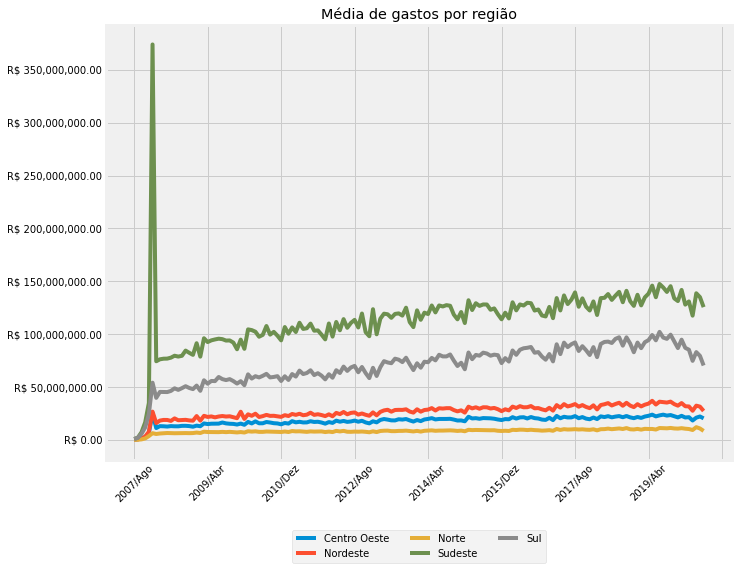

In [32]:
# aqui vamos plotar nosso gráfico
ax = media_regiao.plot(figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(0.5, -0.15), loc ='upper center', ncol=3)
plt.title('Média de gastos por região')
plt.xticks(rotation=45);

### Comparação entre os top5 gastadores com o estado da Bahia

In [33]:
# adicionando o item Bahia a lista do top5
top5.insert(0, '29 Bahia')

In [34]:
# criando um dataframe a partir das colunas na lista top5
top5mais1 = usaveis.loc[top5].T
top5mais1.drop('Regiao', axis=0, inplace=True)

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


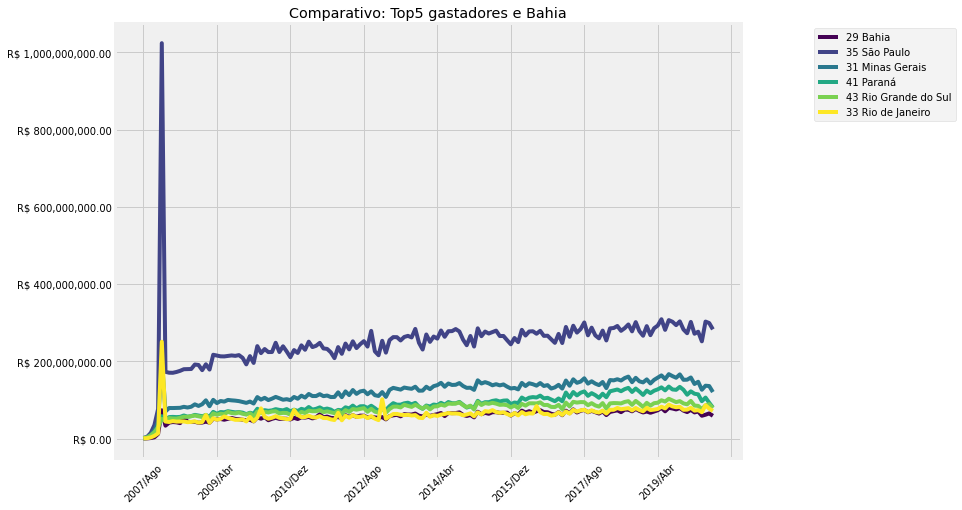

In [35]:
# hora de plotar
ax = top5mais1.plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Comparativo: Top5 gastadores e Bahia');

### Selecionando dados a partir de Fevereiro de 2008

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


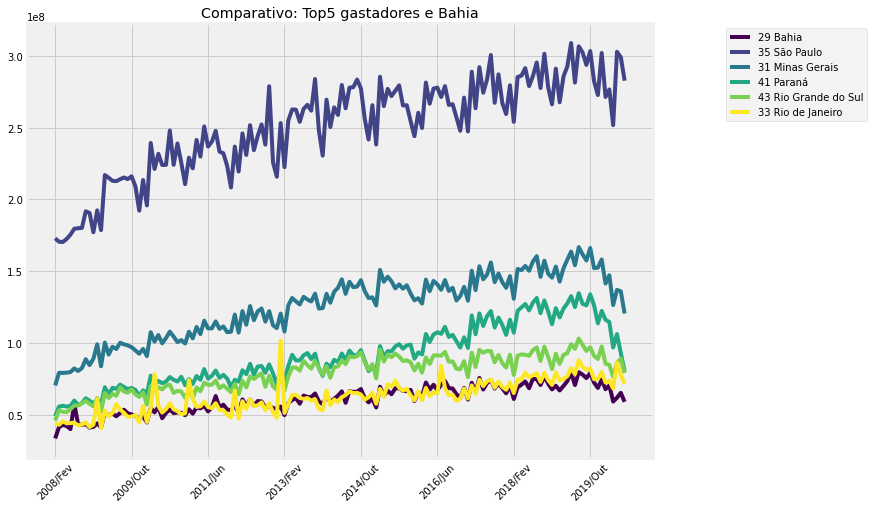

In [36]:
# aqui vamos iniciar a contagem a partir de Fevereiro de 2008
top5mais1.loc['2008/Fev':].plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Comparativo: Top5 gastadores e Bahia');

### Plotar só os estados da região sudeste e ver se os estados foram afetados de forma similar entre 2012/2013

In [37]:
# primeir vamos capturar somente os estados do sudeste
# pegamos a partir de Fev de 2008 pq é a partir daí que tem dados válidos
sudeste = usaveis.loc[:,'2008/Fev':].groupby('Regiao').get_group('Sudeste')
sudeste.drop('Regiao', axis=1, inplace=True) # essa linha não vai servir pra nada

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


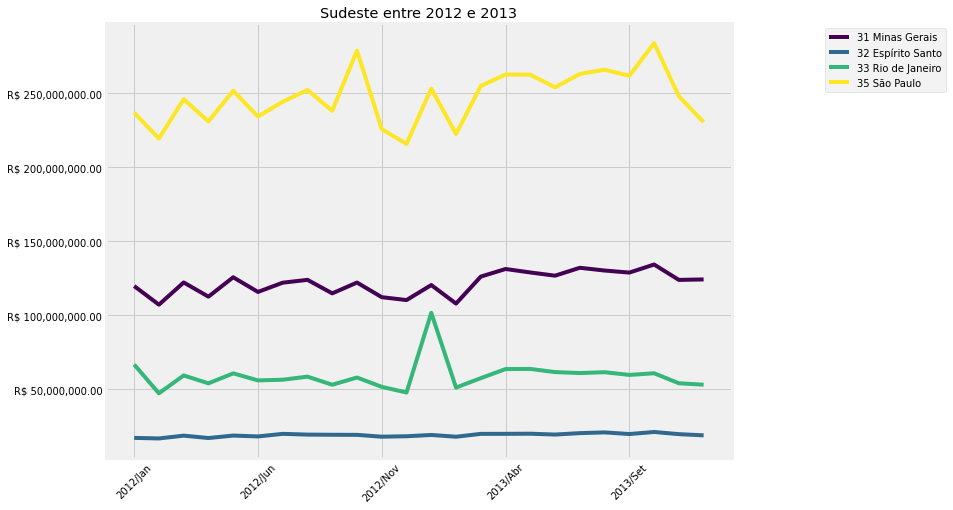

In [38]:
# agora selecionamos a data para entre Jan de 2012 e Dez de 2013
ax = sudeste.T.loc['2012/Jan':'2013/Dez'].plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Sudeste entre 2012 e 2013');

In [39]:
# agora vamos adicionar mais um estado para fazer o comparativo
bahia = usaveis.T.loc['2008/Fev':]['29 Bahia']
bahia.drop('Regiao', axis=0, inplace=True)
sudeste = sudeste.append(bahia).T

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


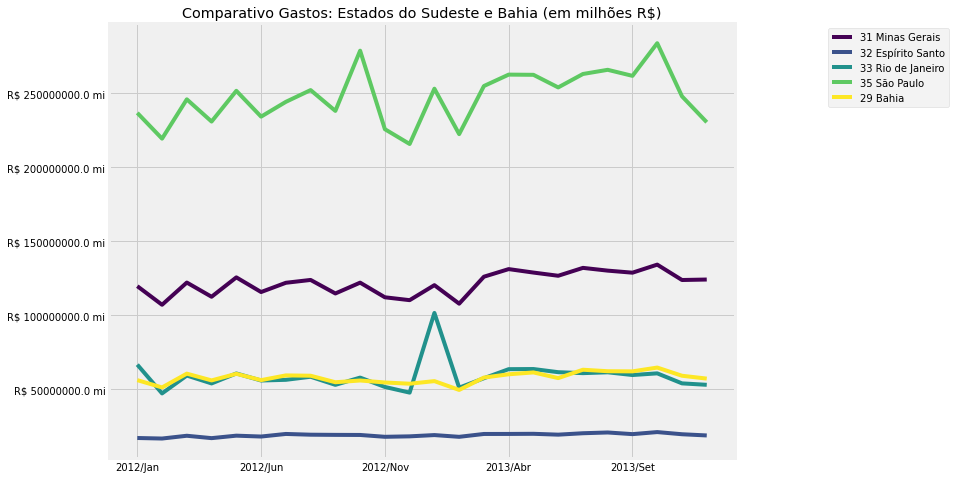

In [40]:
# agora vamos plotar
ax = sudeste.loc['2012/Jan':'2013/Dez'].plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x} mi'))
plt.legend(bbox_to_anchor=(1.35, 1.))
plt.annotate('Incremento repentino em Janeiro de 2013', xy=(12.0, 97.0), xytext=(15.0, 100.0), arrowprops=dict(facecolor='black', shrink=0.05));
plt.title('Comparativo Gastos: Estados do Sudeste e Bahia (em milhões R$)');

## **Aula 04**

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


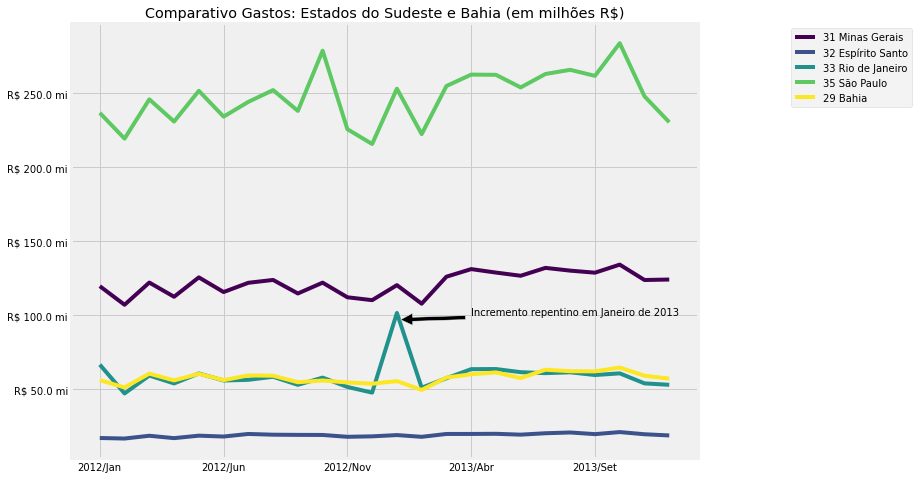

In [41]:
# vamos plotar o grafico novamente, mas melhorando o eixo y
# veja que dividimos os valores por um milhao para melhor legibilidade
ax = (sudeste.loc['2012/Jan':'2013/Dez']/1000000).plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:} mi"))
plt.legend(bbox_to_anchor=(1.35, 1.))
plt.annotate('Incremento repentino em Janeiro de 2013', xy=(12.0, 97.0), xytext=(15.0, 100.0), arrowprops=dict(facecolor='black', shrink=0.05));
plt.title('Comparativo Gastos: Estados do Sudeste e Bahia (em milhões R$)');

Manipulando um pouco o eixo Y da para perceber a distorção causada na comparação dos dados, trazendo desinformação. O valor inicial do eixo y foi colocado como 50, trazendo dados de alguns bem abaixo do grafico, causando uma ilusão de maior distanciamento do que o real entre os menos gastadores e os mais gastadores.

Um olhar desatento para o gráfico (sem fazer a leitura) mostra que SP gastou umas 4 vezes mais que RJ em Janeiro de 2013.

No entanto, ao fazer a devida leitura, somos informados que a diferença de gastos é de 2.5 vezes.

c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


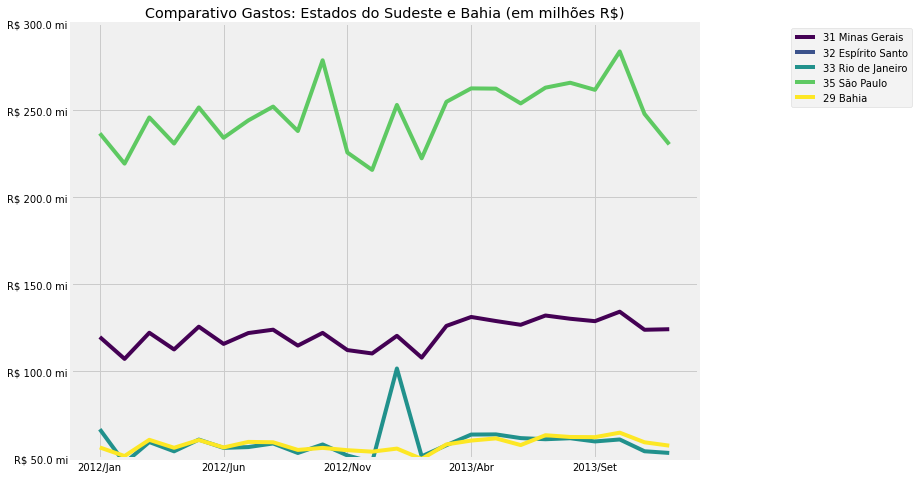

In [42]:
# vamos plotar o grafico novamente, mas melhorando o eixo y
# veja que dividimos os valores por um milhao para melhor legibilidade
ax = (sudeste.loc['2012/Jan':'2013/Dez']/1000000).plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:} mi"))
plt.ylim([50, 300])
plt.legend(bbox_to_anchor=(1.35, 1.))
plt.title('Comparativo Gastos: Estados do Sudeste e Bahia (em milhões R$)');

## **Aula 05**

In [43]:
usaveis['Total'] = usaveis.sum(axis=1)

In [44]:
# vamos criar o dataframe organizando as linhas por total de gasto em ordem decrescente
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total.drop(['Total', 'Regiao'], axis=1, inplace=True)

In [45]:
# aqui vamos pegar o ultimo mes (ultima coluna)
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [46]:
# vamos pegar os gastos mais recentes de todos estados
gastos_mais_recentes = ordenado_por_total[mes_mais_recente]
gastos_mais_recentes.head()

Unidade da Federação
35 São Paulo           282709570.31
31 Minas Gerais        120467187.34
41 Paraná               80320852.69
43 Rio Grande do Sul    78929703.81
33 Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

Plotando em pizza para comprovar como modelo de grafico e ineficiente:
- muita bagunça nas legendas
- impossível de comparar valores e grandezas
- sem precisão nenhuma
- cores repetidas
- ruim para definir ordem
- nao da para saber os valores absolutos

<AxesSubplot:ylabel='2020/Jul'>

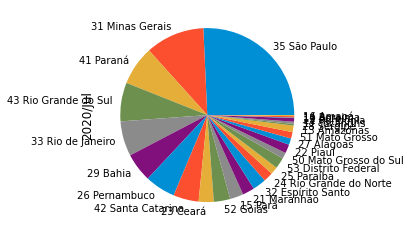

In [47]:
gastos_mais_recentes.plot(kind='pie')

Uma simples tabela é melhor para comparar grandezas.
Tomemos o estado do RJ por exemplo. Basta dividirmos o gasto de cada estado pelo gasto do RJ e teremos os valores relativos.

In [48]:
gastos_mais_recentes / gastos_mais_recentes['33 Rio de Janeiro']

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

Seguindo o desafio da aula 5, vamos comparar os gastos da Bahia com o das outras unidades da federação.
Vamos deixar o valores organizados em ordem decrescente.
<br>
<br>
**desafio: criar tabela de comparação com seu estado (ou estado de preferência)**

In [49]:
(gastos_mais_recentes / gastos_mais_recentes['29 Bahia']).sort_values(ascending=False)

Unidade da Federação
35 São Paulo             4.80
31 Minas Gerais          2.05
41 Paraná                1.36
43 Rio Grande do Sul     1.34
33 Rio de Janeiro        1.21
26 Pernambuco            1.06
29 Bahia                 1.00
42 Santa Catarina        0.88
52 Goiás                 0.57
23 Ceará                 0.52
15 Pará                  0.47
32 Espírito Santo        0.47
21 Maranhão              0.41
53 Distrito Federal      0.38
24 Rio Grande do Norte   0.33
22 Piauí                 0.31
25 Paraíba               0.26
13 Amazonas              0.23
27 Alagoas               0.22
51 Mato Grosso           0.22
50 Mato Grosso do Sul    0.21
11 Rondônia              0.13
17 Tocantins             0.08
28 Sergipe               0.06
14 Roraima               0.05
16 Amapá                 0.04
12 Acre                  0.02
Name: 2020/Jul, dtype: float64

Vamos ver a tabela acima representada num grafico de barras.
<br><br>
Ainda comparando com o grafico de pizza, veja como o grafico em barra é mais claro para visualização dos dados.

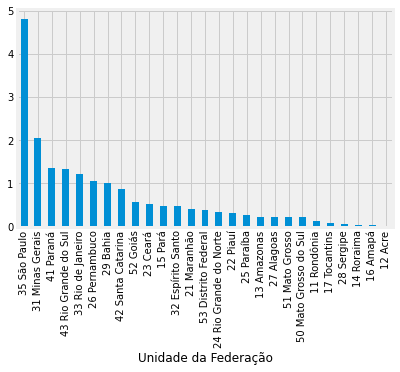

In [50]:
(gastos_mais_recentes / gastos_mais_recentes['29 Bahia']).sort_values(ascending=False).plot(kind='bar');

Continuando a brincadeira com a eficiência do grafico me barras, veja os top10 gastadores.

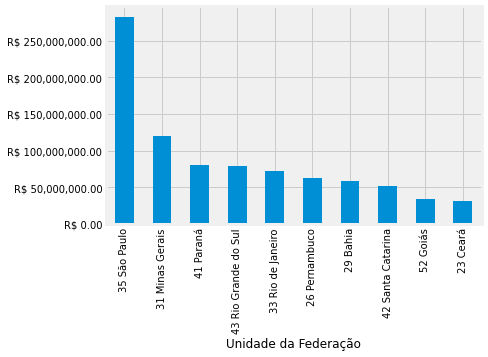

In [51]:
ax = gastos_mais_recentes.head(10).sort_values(ascending=False).plot(kind='bar')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'));

desafio: compara gastos por estado comparando com respectivas populações

In [52]:
# vamos pegar a tabela de população por estado da página da wikipedia
url_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
populacao_por_estado = pd.read_html(url_wiki)[0]
populacao_por_estado = populacao_por_estado[['Unidade federativa', 'População']]
populacao_por_estado.sort_values('Unidade federativa', inplace=True)

In [53]:
# aqui vamos limpar o nome dos estados tirando o numero que vem no inicio
gastos_mais_recentes.index = [i[3:] for i in gastos_mais_recentes.index]

In [54]:
# a transformação de Series para Dataframe vai facilitar nossas operações
gastos_mais_recentesdf = pd.DataFrame(gastos_mais_recentes)
gastos_mais_recentesdf = gastos_mais_recentesdf.sort_index()

In [55]:
populacao_por_estado['População'] = populacao_por_estado['População'].str.replace(" ","")

In [56]:
# transformando a coluna população para facilitar nos cálculos
populacao_por_estado['População'] = populacao_por_estado['População'].astype('int32')
populacao_por_estado.set_index('Unidade federativa', inplace=True)

In [57]:
# unindo os 2 dataframes
gastos_populacao = pd.concat([gastos_mais_recentesdf['2020/Jul'], populacao_por_estado['População']], axis=1)

In [58]:
# adicionando nova coluna e organizando por gasto/habitante
gastos_populacao['gasto_hab'] = gastos_populacao['2020/Jul']/gastos_populacao['População']
gastos_populacao.sort_values('gasto_hab', ascending=False, inplace=True)
gastos_populacao.head()

,2020/Jul,População,gasto_hab
Unidade federativa,,,
Distrito Federal,22233542.26,3055149,7.28
Santa Catarina,51764534.76,7252502,7.14
Paraná,80320852.69,11516840,6.97
Rio Grande do Sul,78929703.81,11422973,6.91
Espírito Santo,27460475.47,4064052,6.76


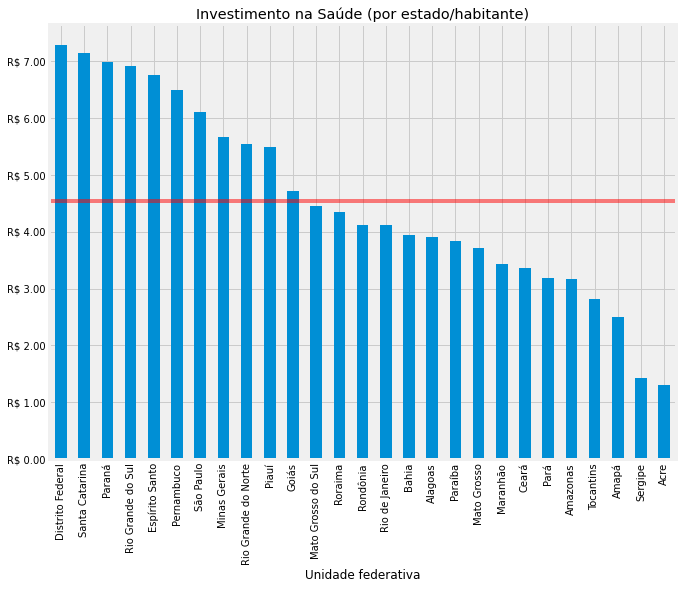

In [59]:
# aqui vamos visualizar nossos dados
ax = gastos_populacao.plot(y='gasto_hab', kind='bar', figsize=(10,8), legend=False)
ax.axhline(gastos_populacao['gasto_hab'].mean(),color='red', alpha=0.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:.2f}'))
plt.title('Investimento na Saúde (por estado/habitante)');

In [60]:
gastos_proporcionais = gastos_mais_recentes/gastos_mais_recentes.sum()*100
gastos_proporcionais

São Paulo             25.72
Minas Gerais          10.96
Paraná                 7.31
Rio Grande do Sul      7.18
Rio de Janeiro         6.51
Bahia                  5.36
Pernambuco             5.67
Santa Catarina         4.71
Ceará                  2.80
Goiás                  3.05
Pará                   2.51
Maranhão               2.22
Espírito Santo         2.50
Rio Grande do Norte    1.78
Paraíba                1.41
Distrito Federal       2.02
Mato Grosso do Sul     1.14
Piauí                  1.64
Alagoas                1.19
Mato Grosso            1.19
Amazonas               1.22
Sergipe                0.30
Tocantins              0.41
Rondônia               0.67
Acre                   0.11
Roraima                0.25
Amapá                  0.20
Name: 2020/Jul, dtype: float64

In [61]:
populacao_por_estado

,População
Unidade federativa,
Acre,894470
Alagoas,3351543
Amapá,861773
Amazonas,4207714
Bahia,14930634
Ceará,9187103
Distrito Federal,3055149
Espírito Santo,4064052
Goiás,7113540


In [62]:
gastos_populacao

,2020/Jul,População,gasto_hab
Unidade federativa,,,
Distrito Federal,22233542.26,3055149,7.28
Santa Catarina,51764534.76,7252502,7.14
Paraná,80320852.69,11516840,6.97
Rio Grande do Sul,78929703.81,11422973,6.91
Espírito Santo,27460475.47,4064052,6.76
Pernambuco,62325444.34,9616621,6.48
São Paulo,282709570.31,46289333,6.11
Minas Gerais,120467187.34,21292666,5.66
Rio Grande do Norte,19593057.45,3534165,5.54


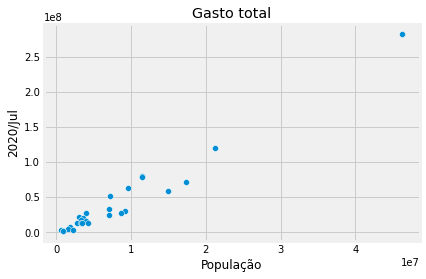

In [63]:
sns.scatterplot(data=gastos_populacao, x='População', y='2020/Jul')
plt.title('Gasto total');

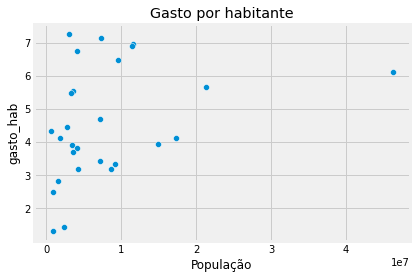

In [64]:
sns.scatterplot(data=gastos_populacao, x='População', y='gasto_hab')
plt.title('Gasto por habitante');

In [65]:
gastos_junho = ordenado_por_total['2020/Jun']

In [66]:
gastos_junho.index = [i[3:] for i in gastos_junho.index]

In [67]:
gastos_populacao['2020/Jun'] = gastos_junho

In [68]:
gastos_junho

São Paulo             299060851.62
Minas Gerais          135977571.87
Paraná                 92901461.36
Rio Grande do Sul      89019478.82
Rio de Janeiro         77604925.21
Bahia                  65159300.63
Pernambuco             68145110.59
Santa Catarina         56503747.99
Ceará                  42146555.81
Goiás                  34437633.20
Pará                   35396030.78
Maranhão               31128144.66
Espírito Santo         27450865.16
Rio Grande do Norte    20219961.81
Paraíba                19666096.87
Distrito Federal       23479773.03
Mato Grosso do Sul     15838659.34
Piauí                  15375523.59
Alagoas                14278872.07
Mato Grosso            14585009.42
Amazonas               17509334.66
Sergipe                 6705923.03
Tocantins               5018138.13
Rondônia                9193593.76
Acre                    2199920.70
Roraima                 3216466.51
Amapá                   2699492.23
Name: 2020/Jun, dtype: float64

In [69]:
gastos_populacao

,2020/Jul,População,gasto_hab,2020/Jun
Unidade federativa,,,,
Distrito Federal,22233542.26,3055149,7.28,23479773.03
Santa Catarina,51764534.76,7252502,7.14,56503747.99
Paraná,80320852.69,11516840,6.97,92901461.36
Rio Grande do Sul,78929703.81,11422973,6.91,89019478.82
Espírito Santo,27460475.47,4064052,6.76,27450865.16
Pernambuco,62325444.34,9616621,6.48,68145110.59
São Paulo,282709570.31,46289333,6.11,299060851.62
Minas Gerais,120467187.34,21292666,5.66,135977571.87
Rio Grande do Norte,19593057.45,3534165,5.54,20219961.81


In [70]:
cols = ['2020/Jun', '2020/Jul', 'População', 'gasto_hab']

In [71]:
gastos_populacao = gastos_populacao[cols]

In [72]:
gastos_populacao

,2020/Jun,2020/Jul,População,gasto_hab
Unidade federativa,,,,
Distrito Federal,23479773.03,22233542.26,3055149,7.28
Santa Catarina,56503747.99,51764534.76,7252502,7.14
Paraná,92901461.36,80320852.69,11516840,6.97
Rio Grande do Sul,89019478.82,78929703.81,11422973,6.91
Espírito Santo,27450865.16,27460475.47,4064052,6.76
Pernambuco,68145110.59,62325444.34,9616621,6.48
São Paulo,299060851.62,282709570.31,46289333,6.11
Minas Gerais,135977571.87,120467187.34,21292666,5.66
Rio Grande do Norte,20219961.81,19593057.45,3534165,5.54


#### Comparando gastos de Junho e Julho entre os estados

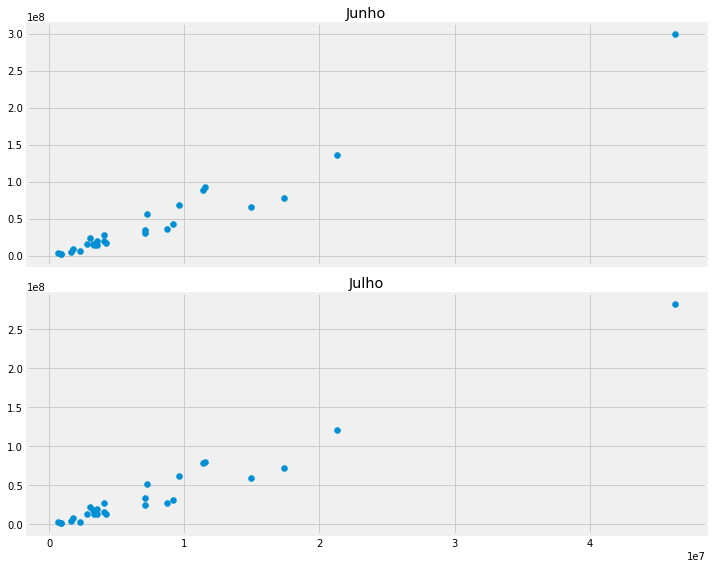

In [73]:
fig, ax = plt.subplots(2, tight_layout=True, figsize=(10,8), sharex=True)

ax[0].scatter(x=gastos_populacao['População'], y=gastos_populacao['2020/Jun'])
ax[0].set_title('Junho')

ax[1].scatter(x=gastos_populacao['População'], y=gastos_populacao['2020/Jul'])
ax[1].set_title('Julho');



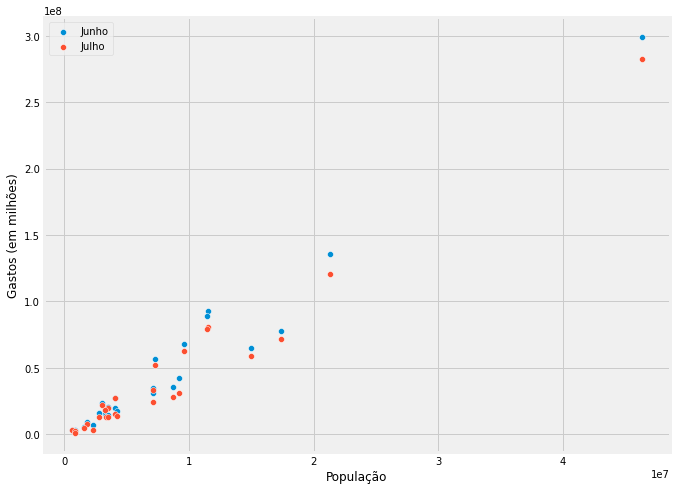

In [74]:
# aqui vamos colocar a dispersão de junho e julho num único gráfico
plt.figure(figsize=(10,8))
sns.scatterplot(data=gastos_populacao, x='População', y='2020/Jun', label='Junho')
sns.scatterplot(data=gastos_populacao, x='População', y='2020/Jul', label='Julho')
plt.ylabel('Gastos (em milhões)')
plt.legend();

In [75]:
# consertando o nome do indice para tirar os numeros que precedem os estados
ordenado_por_total.index = ordenado_por_total.index.str[3:]

In [76]:
# vamos pegar os dados a partir de Fevereiro de 2008, conforme na aula
ordenado_por_total_fev = ordenado_por_total.loc[:,'2008/Fev':]

## Aula 03

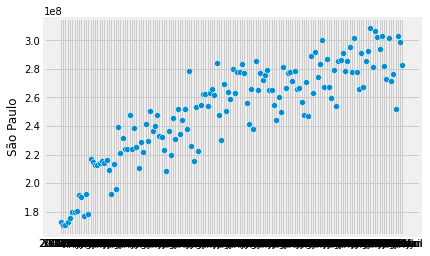

In [77]:
# aqui fazemos uma 'gambiarra' e atribuimos a y uma serie de .loc[]
# quando o correto para isso é passar o nome da coluna para y
sns.scatterplot(x=ordenado_por_total_fev.loc['São Paulo'].index, y=ordenado_por_total_fev.loc['São Paulo']);

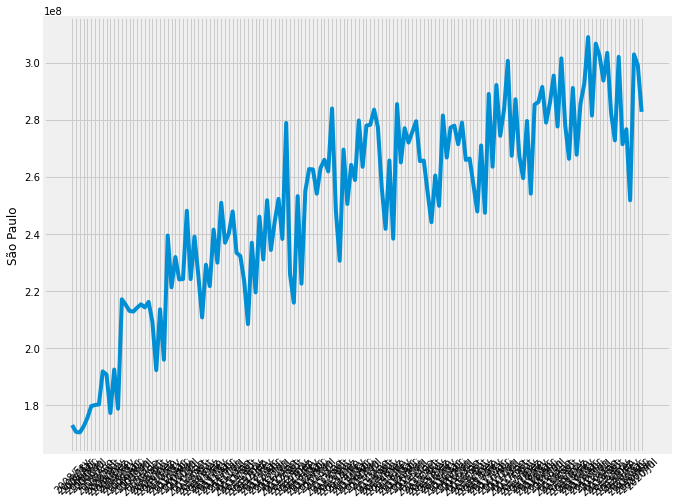

In [78]:
# vamos aqui fazer do jeito correto, ou seja, passando nome da coluna para y
# tambem vamos usar linhas, ja que trata-se de serie temporal
mensal = ordenado_por_total_fev.T # transpondo o dataframe para que os estados fiquem como colunas
plt.figure(figsize=(10,8))
sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=45);

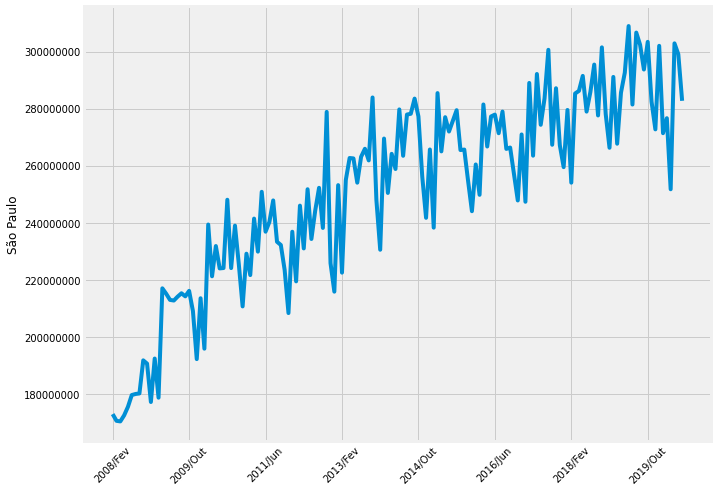

In [79]:
# o grafico acima ainda nao esta bom
# vamos dar uma melhorada formatando os eixos 
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo') # temos que instanciar a um objeto
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}')) # formatando eixo y como objeto
ax.xaxis.set_major_locator(ticker.AutoLocator()) # alterando local e melhorando a legibilidade do eixo x
plt.xticks(rotation=45);

In [80]:
# vamos dividir os valor por 1 milhao para excluirmos os zeros na plotagem
mensal = mensal/1000000

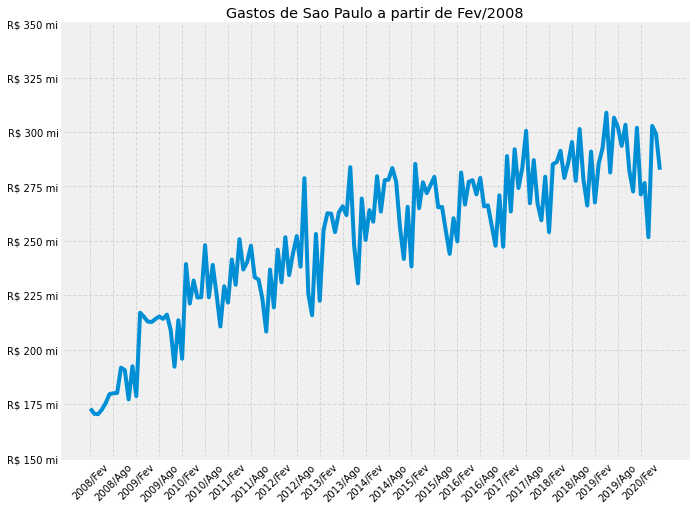

In [81]:
# aqui vamos repetir a mesma plotagem, mas agora formatando ainda mais o eixo x
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo') 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.0f} mi')) 

# usando o indexlocator para customizar ainda mais
# primeiro argumento eh de quanto em quanto e segundo argumento eh quando se inicia
# como o primeiro mes eh fevereiro, o offset como 0 indica que eh de fevereiro que começamos a plotar
ax.xaxis.set_major_locator(ticker.IndexLocator(base=6, offset=0)) 

# tirando o label do eixo y para nao ter poluição visual
ax.set_ylabel('')

# setando os limites do eixo y
plt.ylim([150,350])

# brincando com o método grid
plt.grid(True, which='major', axis='both', ls='--', lw=1, color='black', alpha=0.1)

# alterando rotação dos ticks do eixo x
plt.xticks(rotation=45)

# usando objeto para setar título
ax.set_title('Gastos de Sao Paulo a partir de Fev/2008');

In [82]:
mensal

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/Mar,276.61,147.08,114.48,84.65,73.59,70.34,59.63,56.71,46.40,34.56,...,15.32,16.00,14.44,14.77,9.19,7.03,7.17,2.86,2.81,2.29
2020/Abr,251.70,126.33,96.73,76.29,68.16,59.11,53.84,51.18,43.47,27.50,...,11.88,14.24,11.94,16.33,8.40,6.20,7.42,2.47,2.30,1.77
2020/Mai,302.86,136.87,106.10,86.08,86.28,61.76,65.42,56.84,54.20,31.87,...,14.18,15.25,13.98,19.44,8.45,6.73,8.58,2.38,2.91,2.70
2020/Jun,299.06,135.98,92.90,89.02,77.60,65.16,68.15,56.50,42.15,34.44,...,15.38,14.28,14.59,17.51,6.71,5.02,9.19,2.20,3.22,2.70


## Aula 04

Para trabalhar com data e hora a principal biblioteca e que vamos trabalhar aqui é a datetime

In [83]:
import datetime

In [84]:
datetime.date.today()

datetime.date(2020, 12, 3)

In [85]:
# vamos transformar o indice do df mensal de strings para formato de data
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [86]:
meses = {
    'Jan':1,
    'Fev':2,
    'Mar':3,
    'Abr':4,
    'Mai':5,
    'Jun':6,
    'Jul':7,
    'Ago':8,
    'Set':9,
    'Out':10,
    'Nov':11,
    'Dez':12
}

def para_dia(ano_mes):
    ano = int(ano_mes[:4])
    mes = ano_mes[5:]
    # vamos usar nosso dicionario para que cada respectivo mes encontro seu valor em forma de numero
    mes_num = int(meses[mes])
    return datetime.date(ano, mes_num, 1)

In [87]:
# alterando nosso indice
mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


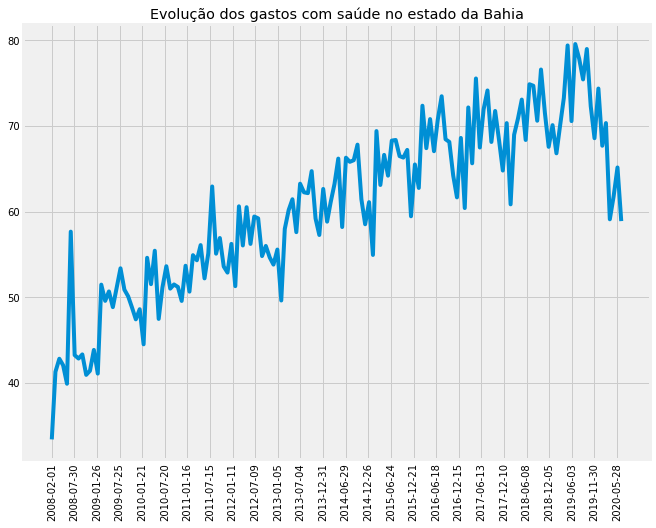

In [88]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='Bahia')
plt.title('Evolução dos gastos com saúde no estado da Bahia')
plt.ylabel('')
# aqui neste locator o argumento base refere-se ao numero de dias
ax.xaxis.set_major_locator(ticker.IndexLocator(base=180, offset=0))
plt.xticks(rotation=90);

Manipulação de dados com Melt

Ao usarmos o codigo com seaborn para plotar o grafico de linha acima, vemos que y so aceita um valor. Mas, e se quisermos plotar mais de um estado? Poderiamos copiar e colar o codigo so alterando o argumento de y? Sim, poderiamos fazer. Mas, alem de ficar uma bagunça existe uma maneira mais eficiente e limpa. Vamos dar uma estudada no metodo melt.

In [89]:
# vamos pegar o datafrma abaixo e criar uma coluna para estados, outra para datas e outra para valores
mensal.head(2)

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18


In [90]:
# aqui aplicamos o melt para criar o novo dataframe
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['data', 'uf', 'gasto']
mensal_aberto.head()

,data,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


In [91]:
# se quisermos escolher alguns estados especificos para plotar e fazer comparacao
# basta criar um subset do df com os estados desejados
mensal_aberto_selecionados = mensal_aberto[mensal_aberto['uf'].isin(['Bahia', 'São Paulo', 'Pernambuco', 'Amazonas'])]

In [92]:
paleta = sns.color_palette("tab10")
sns.set_palette(paleta)

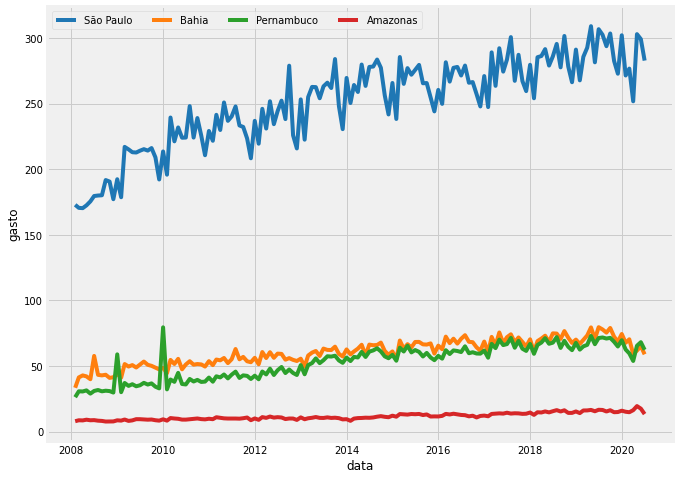

In [93]:
plt.figure(figsize=(10,8))
sns.lineplot(data=mensal_aberto_selecionados, x='data', y='gasto', hue='uf')
plt.legend(ncol=4, loc='best');

In [94]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Desafio 01

Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

In [95]:
# primeira ponto interessante que achei foi esse de poder quebrar uma data em varios formatos
d = datetime.date(2020, 12, 1)
print(f"A data {d.strftime('%d')} de {d.strftime('%B')} de {d.strftime('%Y')} caiu numa {d.strftime('%A')}.")
d.strftime('Dia semana: %A, Dia mes: %d, Mes nome: %B, Mes sigla: %b, Mes numero: %m, Ano abr: %y, Ano numero: %Y')

A data 01 de December de 2020 caiu numa Tuesday.


'Dia semana: Tuesday, Dia mes: 01, Mes nome: December, Mes sigla: Dec, Mes numero: 12, Ano abr: 20, Ano numero: 2020'

In [96]:
m = datetime.date(1995, 11, 10)
m.replace(year=1990)

datetime.date(1990, 11, 10)

In [97]:
a = datetime.date.today() - datetime.date(1940, 11, 22)

### Desafio 02

Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [98]:
mensal_aberto_para_original = mensal_aberto.pivot(index='data', columns='uf', values='gasto')
mensal_aberto_para_original.index.name = None
mensal_aberto_para_original.columns.name = None
mensal_aberto_para_original.columns = mensal.columns
mensal_aberto_para_original.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,...,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,...,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,...,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,...,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,...,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40


## Aula 05

E se quisermos analisar os gastos por mes? Ou seja, fazemos um acumulado dos respectivos meses de cada ano e plotamos essa variação mês a mês num gráfico. Isto pode ser útil quando queremos ver a variação dos gastos mensais para um único estado. Por exemplo, quero ver o acumulado de gastos mensais para o estado da Bahia. Sera que todo mês de fevereiro tem pico? Para realizar essa tarefa vamos manipular os dados da coluna data, que está como objeto, e transformá-lo para datetime. A partir daí podemos extrair o que quisermos, dia, mês ou ano.
<br>

Vamos aos exemplos abaixo para ficar mais claro.

In [99]:
# veja que o tipo de dado desta serie é objeto
# queremos separar esta data em dias e meses
mensal_aberto['data']

0       2008-02-01
1       2008-03-01
2       2008-04-01
3       2008-05-01
4       2008-06-01
           ...    
4045    2020-03-01
4046    2020-04-01
4047    2020-05-01
4048    2020-06-01
4049    2020-07-01
Name: data, Length: 4050, dtype: object

In [100]:
# para quebrar as datas em meses e anos primeiro temos que transformar o tipo de dados
mensal_aberto['data'] = pd.to_datetime(mensal_aberto['data'])
# outra forma de fazer esta transformação segue abaixo
#mensal_aberto['data'] = mensal_aberto['data'].astype('datetime64')

# aqui vamos criar as novas colunas quebrando a data em mes e dia
mensal_aberto['mes'] = mensal_aberto['data'].dt.month
mensal_aberto['ano'] = mensal_aberto['data'].dt.year
mensal_aberto.head()


,data,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008


O dataframe esta do jeito que a gente quer, mas ao plotar o grafico abaixo vemos que ele ainda nao esta do jeito que a gente quer. Por que? Foi plotado o gasto com os meses no eixo x e os anos como categorias. Essa bagunça toda que pode ver abaixo aconteceu porque o gráfico plotou todos os ano para cada estado

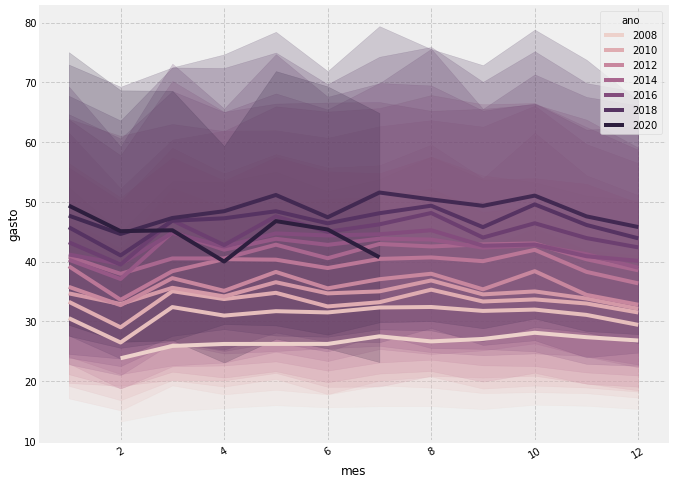

In [101]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=mensal_aberto, x='mes', y='gasto', hue='ano')
plt.xticks(rotation=30)
#plt.ylim(0,350)
plt.grid(ls='--')

Para resolver o problema explicado acima, vamos fazer uma query selecionando somente um estado.

In [102]:
bahia = mensal_aberto.query("uf=='Bahia'")

Agora perceba no grafico abaixo que todos os anos e respectivos meses do periodo são mostrados para o estado da Bahia

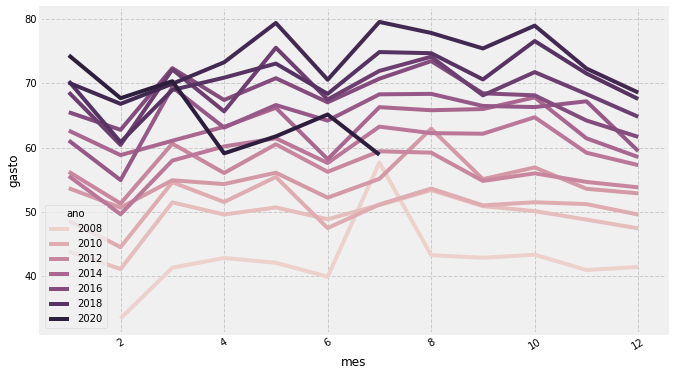

In [103]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=bahia, x='mes', y='gasto', hue='ano')
plt.xticks(rotation=30)
plt.grid(ls='--')

### Desafio 01

Melhorar o gráfico ano a ano:
- Mudar a palete de cor;
- Colocar um título descritivo;
- Adicionar ticks com o nome de cada mês no eixo x;

In [104]:
bahia['mes_nome'] = bahia['data'].dt.strftime('%b')

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


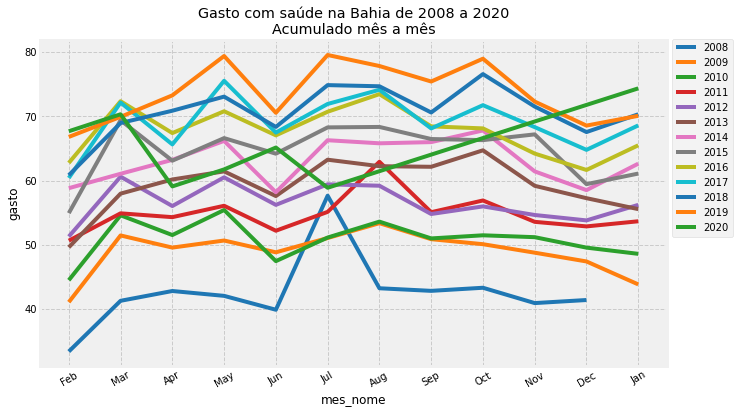

In [105]:
plt.figure(figsize=(10,6))
# veja que na nossa palete de cores, escolhemos o numero de cores que representara cada categoria
# este eh o segundo argumento do metodo color_palette
ax = sns.lineplot(data=bahia, x='mes_nome', y='gasto', hue='ano', palette=sns.color_palette('tab10', 13))
plt.xticks(rotation=30)
plt.title('Gasto com saúde na Bahia de 2008 a 2020\nAcumulado mês a mês')
plt.legend(bbox_to_anchor=(1,1.02))
plt.grid(ls='--')

Vamos criar uma coluna que informa o gasto por dia de cada mes

In [106]:
# para isso, vamos criar um dicionario com os dias por mes

dias_por_mes = {
    1:31,
    2:28,
    3:31,
    4:30,
    5:31,
    6:30,
    7:31,
    8:31,
    9:30,
    10:31,
    11:30,
    12:31
}

In [107]:
mensal_aberto['mes'].map(dias_por_mes)

0       28
1       31
2       30
3       31
4       30
        ..
4045    31
4046    30
4047    31
4048    30
4049    31
Name: mes, Length: 4050, dtype: int64

In [108]:
# criand a coluna com gasto diarios
mensal_aberto['gasto_diario'] = mensal_aberto['gasto']/mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto

,data,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,6.17
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85
...,...,...,...,...,...,...
4045,2020-03-01,Amapá,2.29,3,2020,0.07
4046,2020-04-01,Amapá,1.77,4,2020,0.06
4047,2020-05-01,Amapá,2.70,5,2020,0.09
4048,2020-06-01,Amapá,2.70,6,2020,0.09


### Desafio 02

Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

In [109]:
amazonas = mensal_aberto.query("uf=='Amazonas'")
amazonas['mes_nome'] = amazonas['data'].dt.strftime('%b')

c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


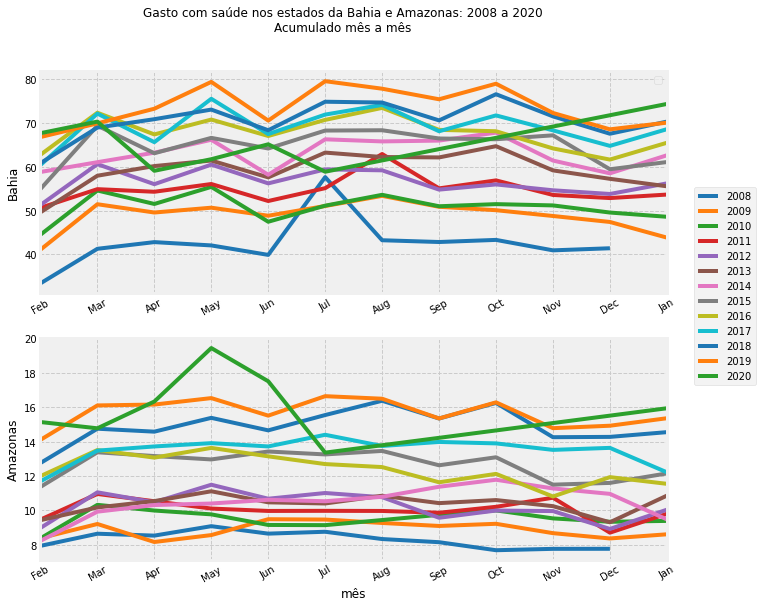

In [110]:
plt.figure(figsize=(10,9))
plt.subplot(2, 1, 1)
sns.lineplot(data=bahia, x='mes_nome', y='gasto', hue='ano', palette=sns.color_palette('tab10', 13))
plt.xticks(rotation=30)
plt.legend('')
plt.xlabel('')
plt.xlim('Feb', 'Jan')
plt.ylabel('Bahia')
plt.grid(ls='--')

plt.subplot(2, 1, 2)
sns.lineplot(data=amazonas, x='mes_nome', y='gasto', hue='ano', palette=sns.color_palette('tab10', 13))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=[1.15, 1.7])
plt.xlabel('mês')
plt.ylabel('Amazonas')
plt.xlim('Feb', 'Jan')
plt.grid(ls='--')

plt.suptitle('Gasto com saúde nos estados da Bahia e Amazonas: 2008 a 2020\nAcumulado mês a mês');

plt.savefig('comparativo.png', dpi=200)

## Aula 06

Trabalhando com groupby. Se quisermos agrupar por ano e fazer um somatorio de cada agrupamento?

In [114]:
gastos_por_ano = mensal_aberto.groupby('ano').sum()
gastos_por_ano.head()

,gasto,mes,gasto_diario
ano,,,
2008,7876.37,2079,259.40
2009,10054.43,2106,330.44
2010,10751.55,2106,353.38
2011,11227.33,2106,369.22
2012,11624.16,2106,382.10


In [171]:
hue_order = gastos_por_ano.reset_index().sort_values('gasto', ascending=True)['ano']
hue_order.index = range(len(hue_order.index))
hue_order

0     2008
1     2020
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2017
11    2018
12    2019
Name: ano, dtype: int64

<AxesSubplot:xlabel='ano', ylabel='gasto'>

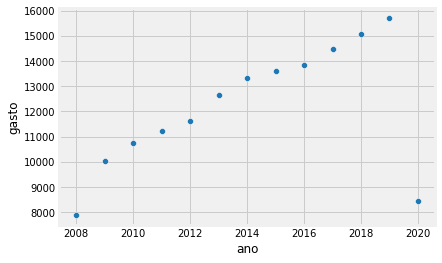

In [122]:
# plotando em sccaterplot
# o ano de 2020 nao esta com os dados completos, portanto teve essa representação mais baixa
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto')

<AxesSubplot:xlabel='ano', ylabel='gasto'>

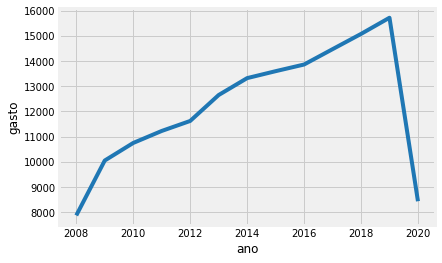

In [124]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto')

In [193]:
# vamos fazer alguns modelos diferentes de plotagem por estado
estados = ['São Paulo', 'Minas Gerais', 'Pernambuco']
# vamos agrupar esses 3 estados e resetar o indice (para transformar os indices em colunas)
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(['uf', 'ano']).sum().reset_index()

<AxesSubplot:xlabel='ano', ylabel='gasto'>

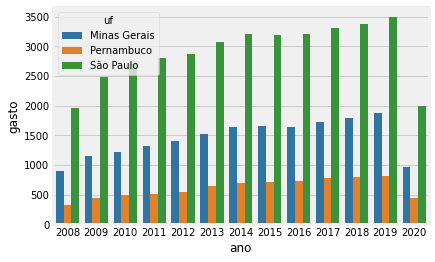

In [196]:
# podemos visualizar os gastos por estado e por ano num unico grafico de barras
sns.barplot(data=por_ano_dos_estados, x='ano', y='gasto', hue='uf')

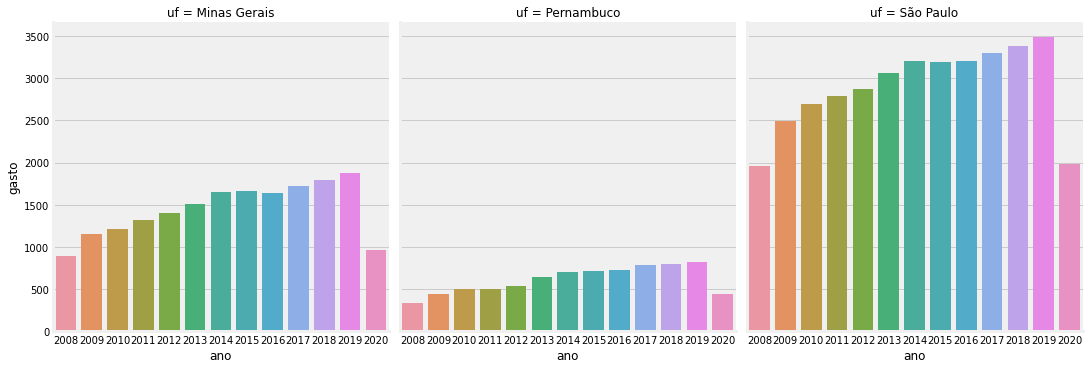

In [200]:
# se quisermos analisar individualmente cada categoria tambem e possível
# com seaborn tambem podemos plotar como se fossem subplots do matplotlib
# neste caso, cada categoria seria uma coluna
# vamos usar o catplot para isso
# com catplot podemos chamar varios tipos de gráficos, inclusive barra como no barplot
sns.catplot(data=por_ano_dos_estados, x='ano', y='gasto', kind='bar', col='uf');

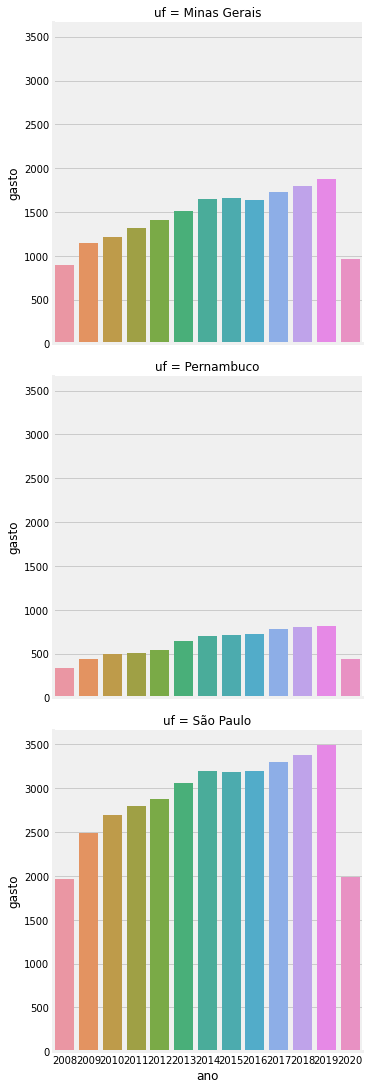

In [222]:
# ou podemos organizar as categorias em linhas tambem
sns.catplot(x='ano', y='gasto', data=por_ano_dos_estados, kind='bar', row='uf');

<AxesSubplot:xlabel='ano', ylabel='gasto'>

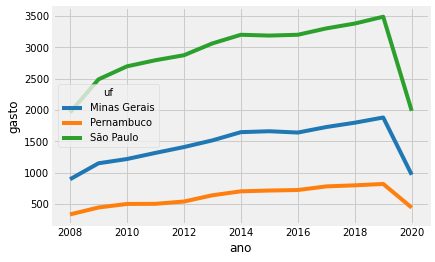

In [220]:
# acima vimos a funcionalidade do catplot
# mas para melhor comparar o desempenho de cada categoria o melhor seria plotar em linhas, conforme abaixo
sns.lineplot(data=por_ano_dos_estados, x='ano', y='gasto', hue='uf')

### Desafio 1

Colocar as cores das barras associadas ao eixo y ('gastos')

In [173]:
# primeiro vamos pegar a sequencia de anos ordenada de acordo com o respectivo gasto
hue_order = gastos_por_ano.reset_index().sort_values('gasto', ascending=True)['ano']
# vamos organizar para que o indice fique em ordem normal
hue_order.index = range(len(hue_order.index))
hue_order

0     2008
1     2020
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2017
11    2018
12    2019
Name: ano, dtype: int64

<AxesSubplot:xlabel='ano', ylabel='gasto'>

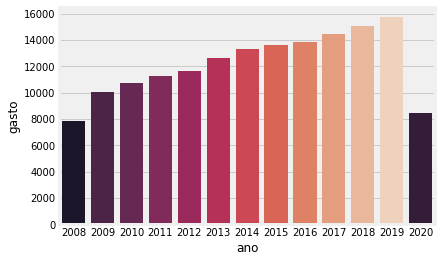

In [178]:
# selecionando palete de cores com numero de tons igual ao tamanho da serie hue_order
palette = sns.color_palette('rocket', len(hue_order))
# colocando num dicionario cada ano como chave e suas respectivas cores como valores
palette_hue_ordered = dict(zip(hue_order, palette))
# agora basta plotar normalmente
sns.barplot(x=gastos_por_ano.index, y='gasto', data=gastos_por_ano, palette=palette_hue_ordered)

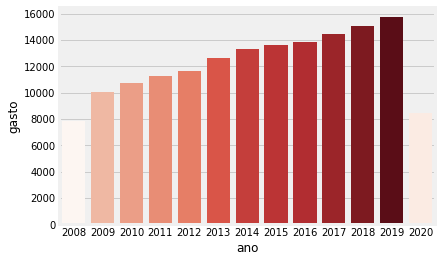

In [182]:
# tambem existe essa solucao abaixo usando o modelu matplotlib
# o metodo to_rgba faz a associação das cores por cada espectro de gasto
import matplotlib as mpl

sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto', 
            palette=mpl.cm.ScalarMappable(cmap='Reds').to_rgba(gastos_por_ano['gasto']));